In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
my_color_palette =  {'Dz 5mg/kg':'#8FB996','NaCl':'#594157', 'PTZ 20mg/kg':'#c7991a'}

In [21]:
# Load EEG data
animal = 'Ent_CamK2_15'
EEG_by_cnd = np.load('Mice_data/'+animal+'_EEG_traces_by_cnd.npy') #Dim: cnd x events x channels x timepoints
conditions = np.load('Mice_data/'+animal+'_cnd_order.npy')
list_channels = np.load('Mice_data/'+animal+'_list_channels.npy')
time_window = 250
Sampling_freq = 2000

['ENT R ventral' 'ENT R dorsal' 'CA1 R' 'CA3 R' 'DG R' 'Sub R' 'CA3 L'
 'CA1 L' 'DG L' 'Sub L' 'ENT L ventral' 'ENT L dorsal']
['ENT R ventral' 'ENT R dorsal' 'CA1 R' 'CA3 R' 'DG R' 'Sub R' 'CA3 L'
 'CA1 L' 'DG L' 'Sub L' 'ENT L ventral' 'ENT L dorsal']
['ENT R ventral' 'ENT R dorsal' 'CA1 R' 'CA3 R' 'DG R' 'Sub R' 'CA3 L'
 'CA1 L' 'DG L' 'Sub L' 'ENT L ventral' 'ENT L dorsal']


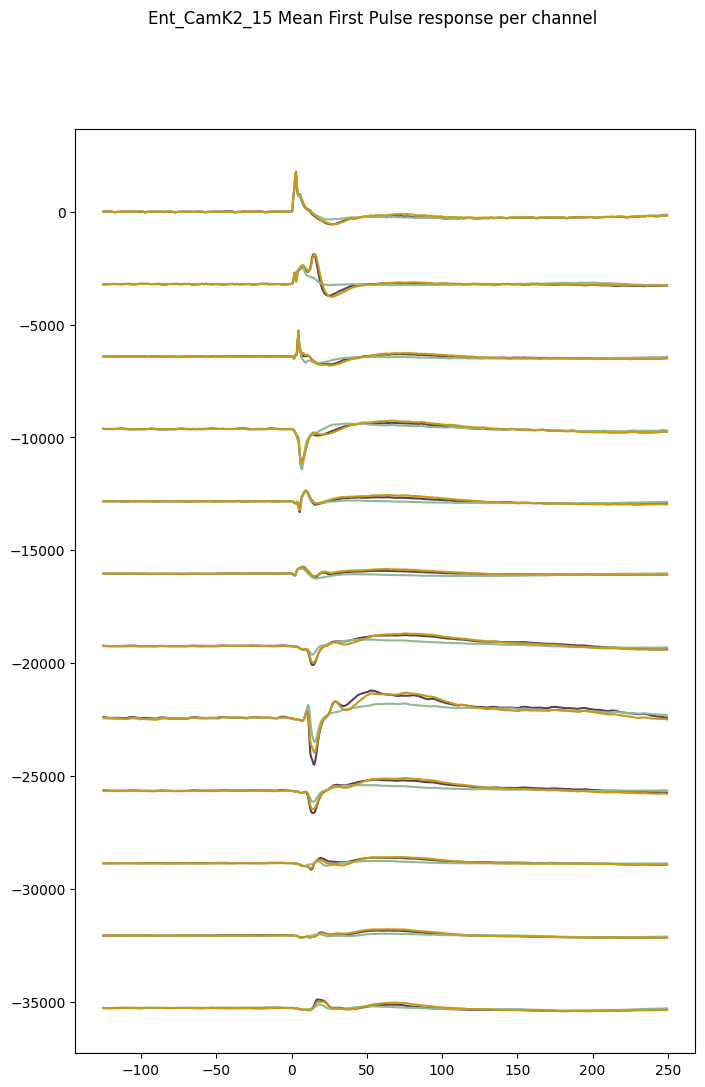

In [25]:
title = animal + " Mean First Pulse response per channel "
fig1 = plt.figure(title, figsize=(8, 12)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
x = np.arange(-time_window / 2, time_window, 1000 / Sampling_freq)
min_value = np.min(EEG_by_cnd); max_value = np.max(EEG_by_cnd)
scaling_factor = (max_value-min_value)/1.7
for i_cnd,cnd in enumerate(conditions):
        print(list_channels)
        color_cnd = my_color_palette[cnd]
        EEG_cnd = EEG_by_cnd[i_cnd]
        Mean_EEG_by_cnd = np.mean(EEG_cnd, axis=0)
        for i_ch,name_channel in enumerate(list_channels):
            ax1.plot(x,Mean_EEG_by_cnd[i_ch]- i_ch*scaling_factor, label=cnd, color=color_cnd)